# <center>Laboratorium 12<br>Metody Numeryczne</center>    


In [59]:
from typing import Union, Callable
import scipy as sp
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def solve_euler(fun: Callable, t_span: np.array, y0: np.array):
    '''
    Funkcja umożliwiająca rozwiązanie układu równań różniczkowych z wykorzystaniem metody Eulera w przód.

    Parameters:
    fun: Prawa strona równania. Podana funkcja musi mieć postać fun(t, y).
    Tutaj t jest skalarem i istnieją dwie opcje dla ndarray y: Może mieć kształt (n,); wtedy fun musi zwrócić array_like z kształtem (n,).
    Alternatywnie może mieć kształt (n, k); wtedy fun musi zwrócić tablicę typu array_like z kształtem (n, k), tj. każda kolumna odpowiada jednej kolumnie w y.
    t_span: wektor czasu dla którego ma zostać rozwiązane równanie
    y0: warunke początkowy równanai o wymiarze (n,)
    Results:
    (np.array): macierz o wymiarze (n,m) zawierająca w wkolumnach kolejne rozwiązania fun w czasie t_span.

    '''
    h = t_span[1] - t_span[0]
    y = np.zeros((t_span.size, y0.size))
    y[0] = y0
    for n in range(len(t_span) - 1):
        y[n+1] = y[n] + h * fun(t_span[n], y[n])
    return np.array(y)

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

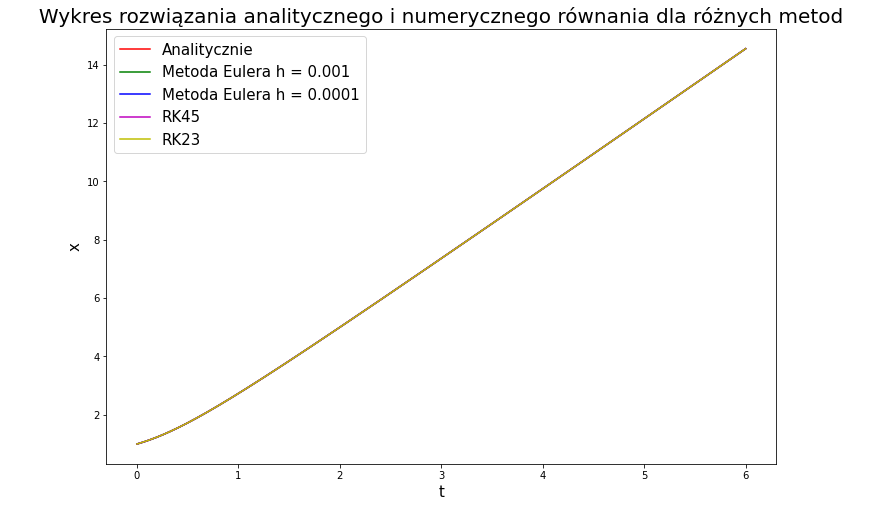

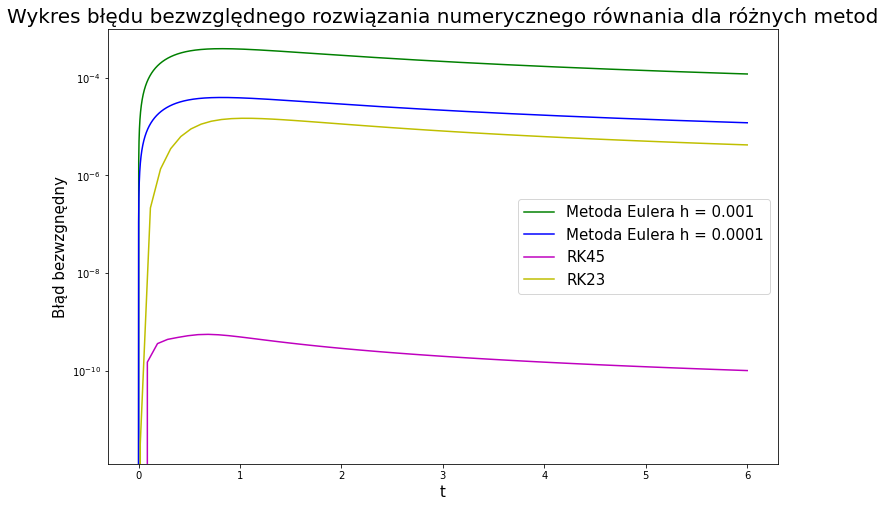

In [60]:
def fun(t,y):
    yr = (y + t)/(y - t)
    return yr

def sol(t):
    y = t + np.sqrt(1 + 2 * (t ** 2))
    return y

plt.figure(figsize=(12, 8))
t = np.arange(0,6+0.001,0.001)
plt.plot(t,sol(t),color='r')

y0 = np.array([1])
y_err = []
t_err = []
color=['g','b']
for h,color in zip([0.001,0.0001],color):
    t = np.arange(0,6+h,h)
    x = solve_euler(fun,t,y0)
    y_err.append(np.abs(x.reshape((len(t),)) - sol(t)))
    t_err.append(t)
    plt.plot(t,x,color=color)

RK45 = solve_ivp(fun,(0,6),y0=y0,method='RK45',max_step=0.1)
y_err.append(np.abs(sol(RK45.t) - RK45.y.reshape(len(RK45.t),)))
t_err.append(RK45.t)
plt.plot(RK45.t,RK45.y.T,color='m')
RK23 = solve_ivp(fun,(0,6),y0=y0,method='RK23',max_step=0.1)
y_err.append(np.abs(sol(RK23.t) - RK23.y.reshape(len(RK23.t),)))
t_err.append(RK23.t)
plt.plot(RK23.t,RK23.y.T,color='y')

plt.legend(['Analitycznie','Metoda Eulera h = 0.001', 'Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15)
plt.title('     Wykres rozwiązania analitycznego i numerycznego równania dla różnych metod     ',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('x',fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
color=['g','b','m','y']
for er,t,color in zip(y_err,t_err,color):
    plt.plot(t,er,color=color)
plt.legend(['Metoda Eulera h = 0.001', 'Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15)
plt.title('Wykres błędu bezwzględnego rozwiązania numerycznego równania dla różnych metod',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('Błąd bezwzgnędny',fontsize=15)
plt.yscale('log')
plt.show()

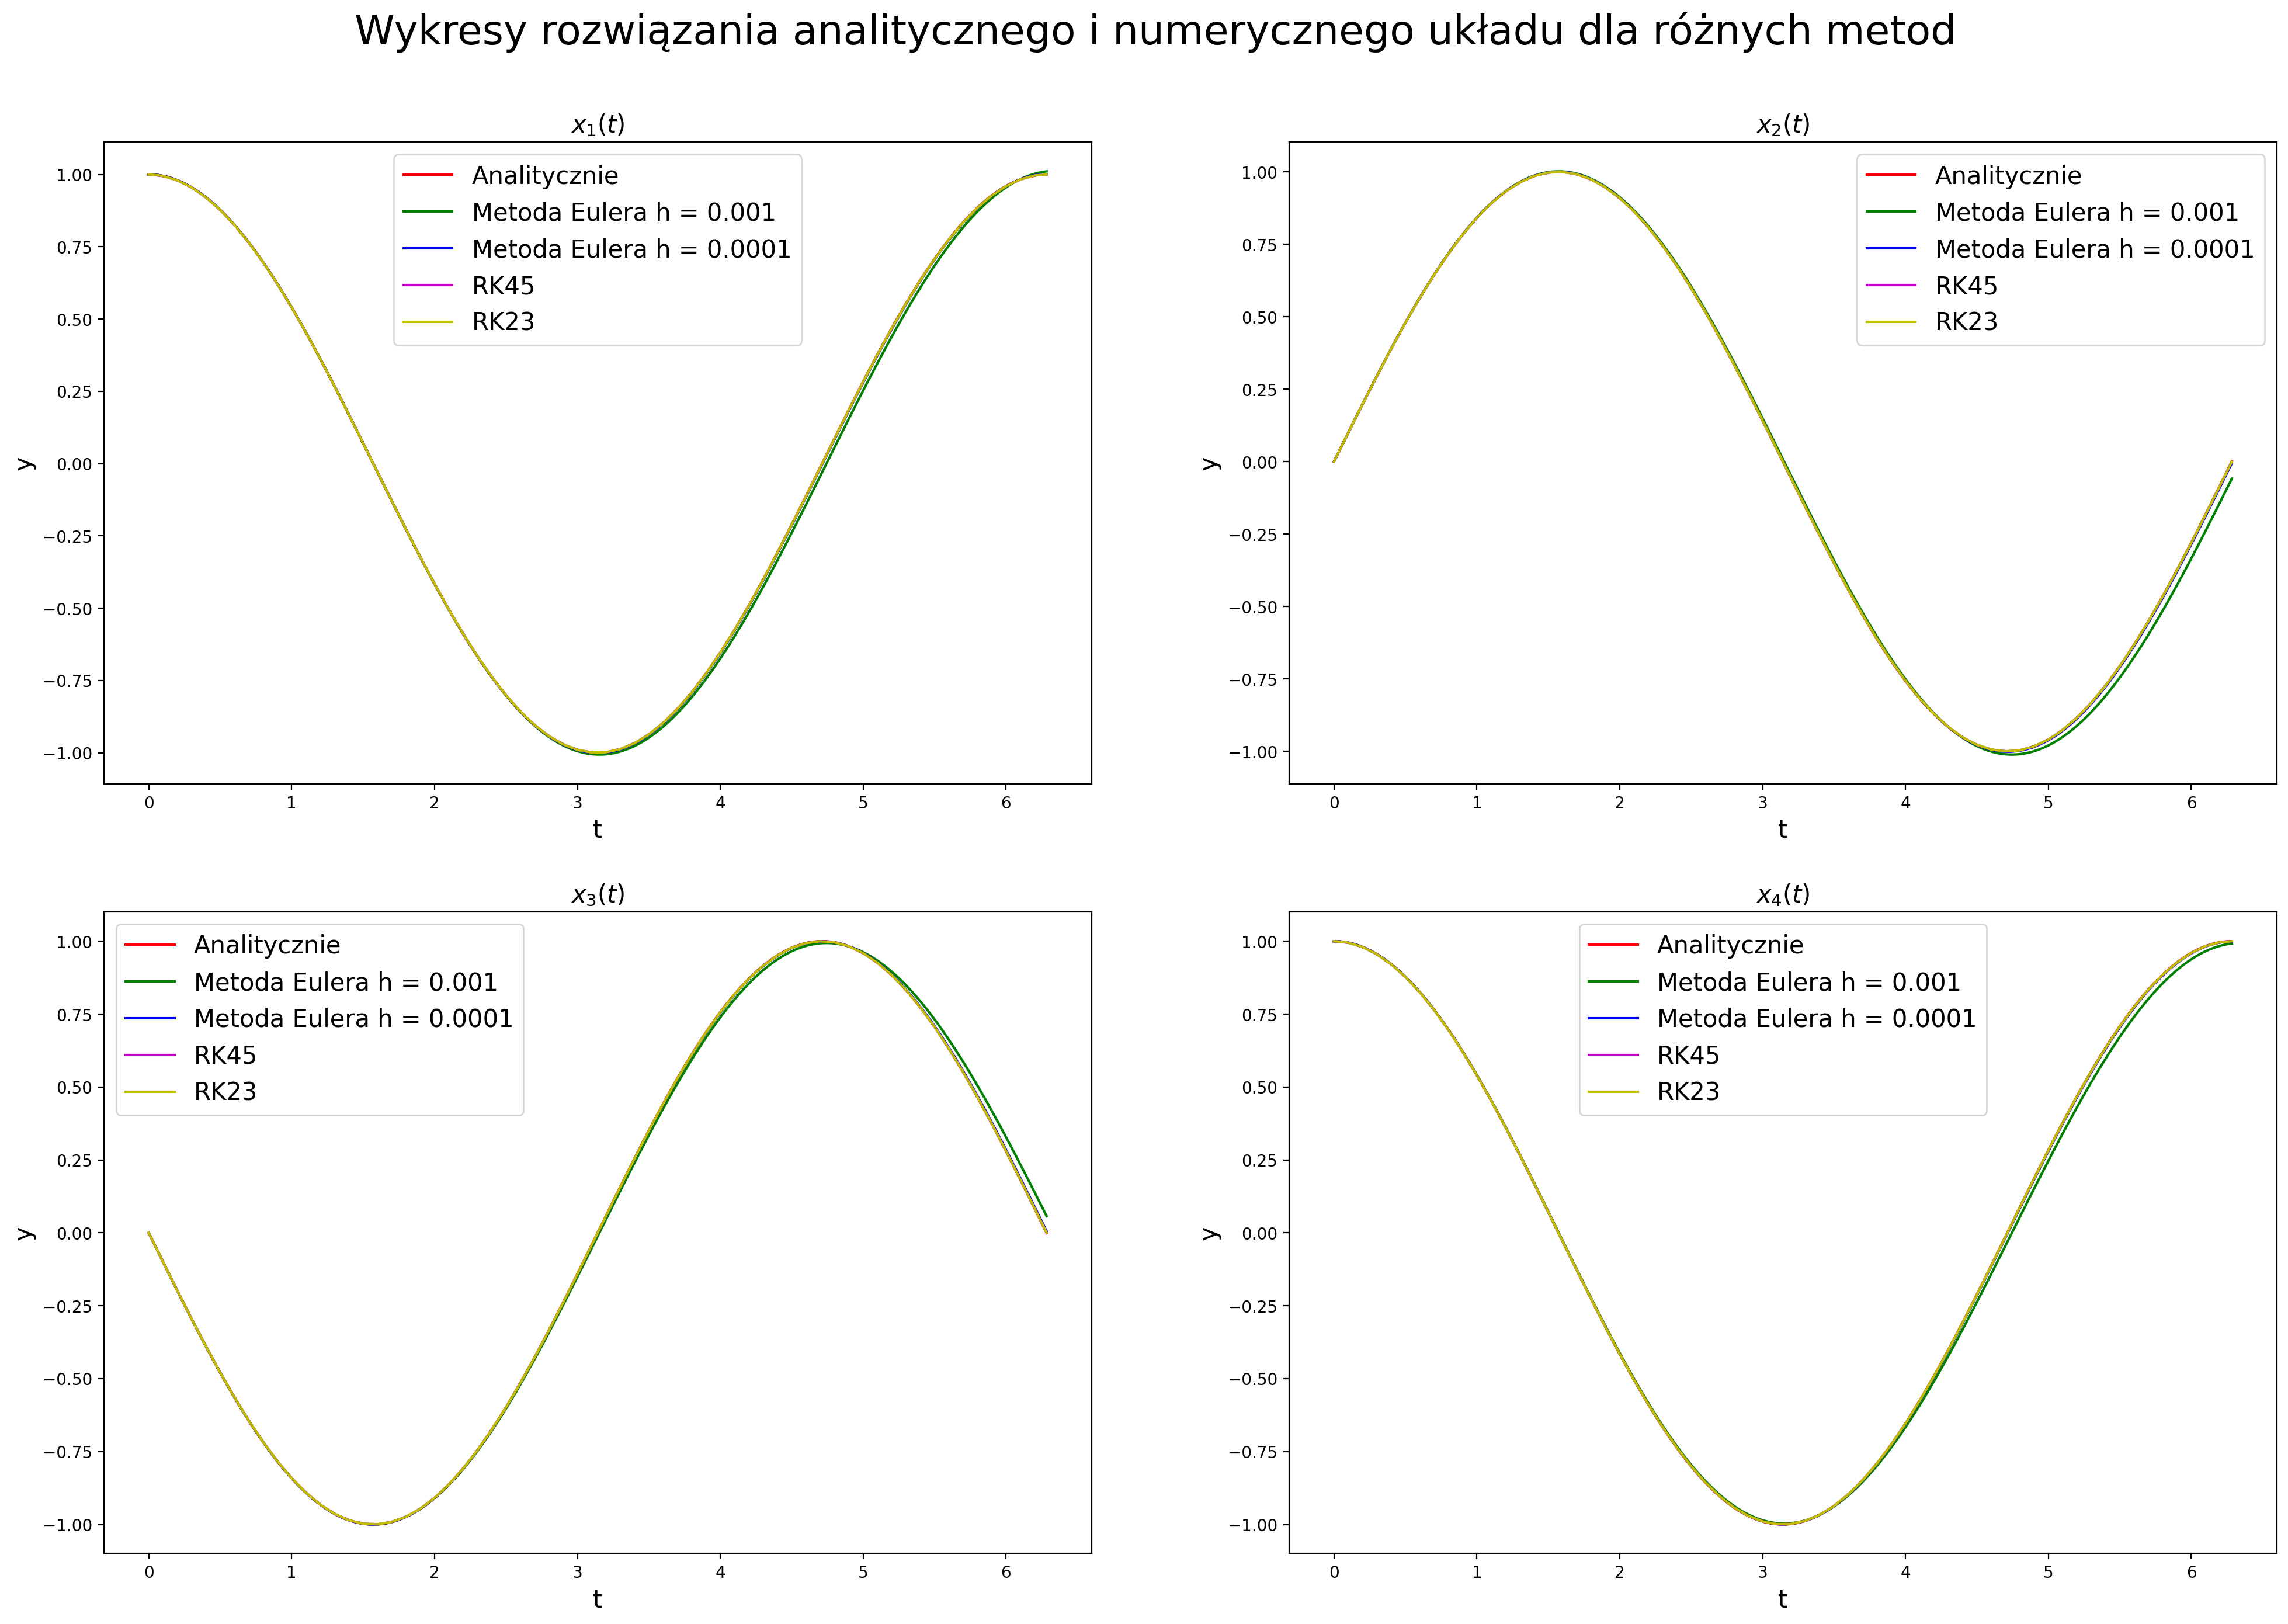

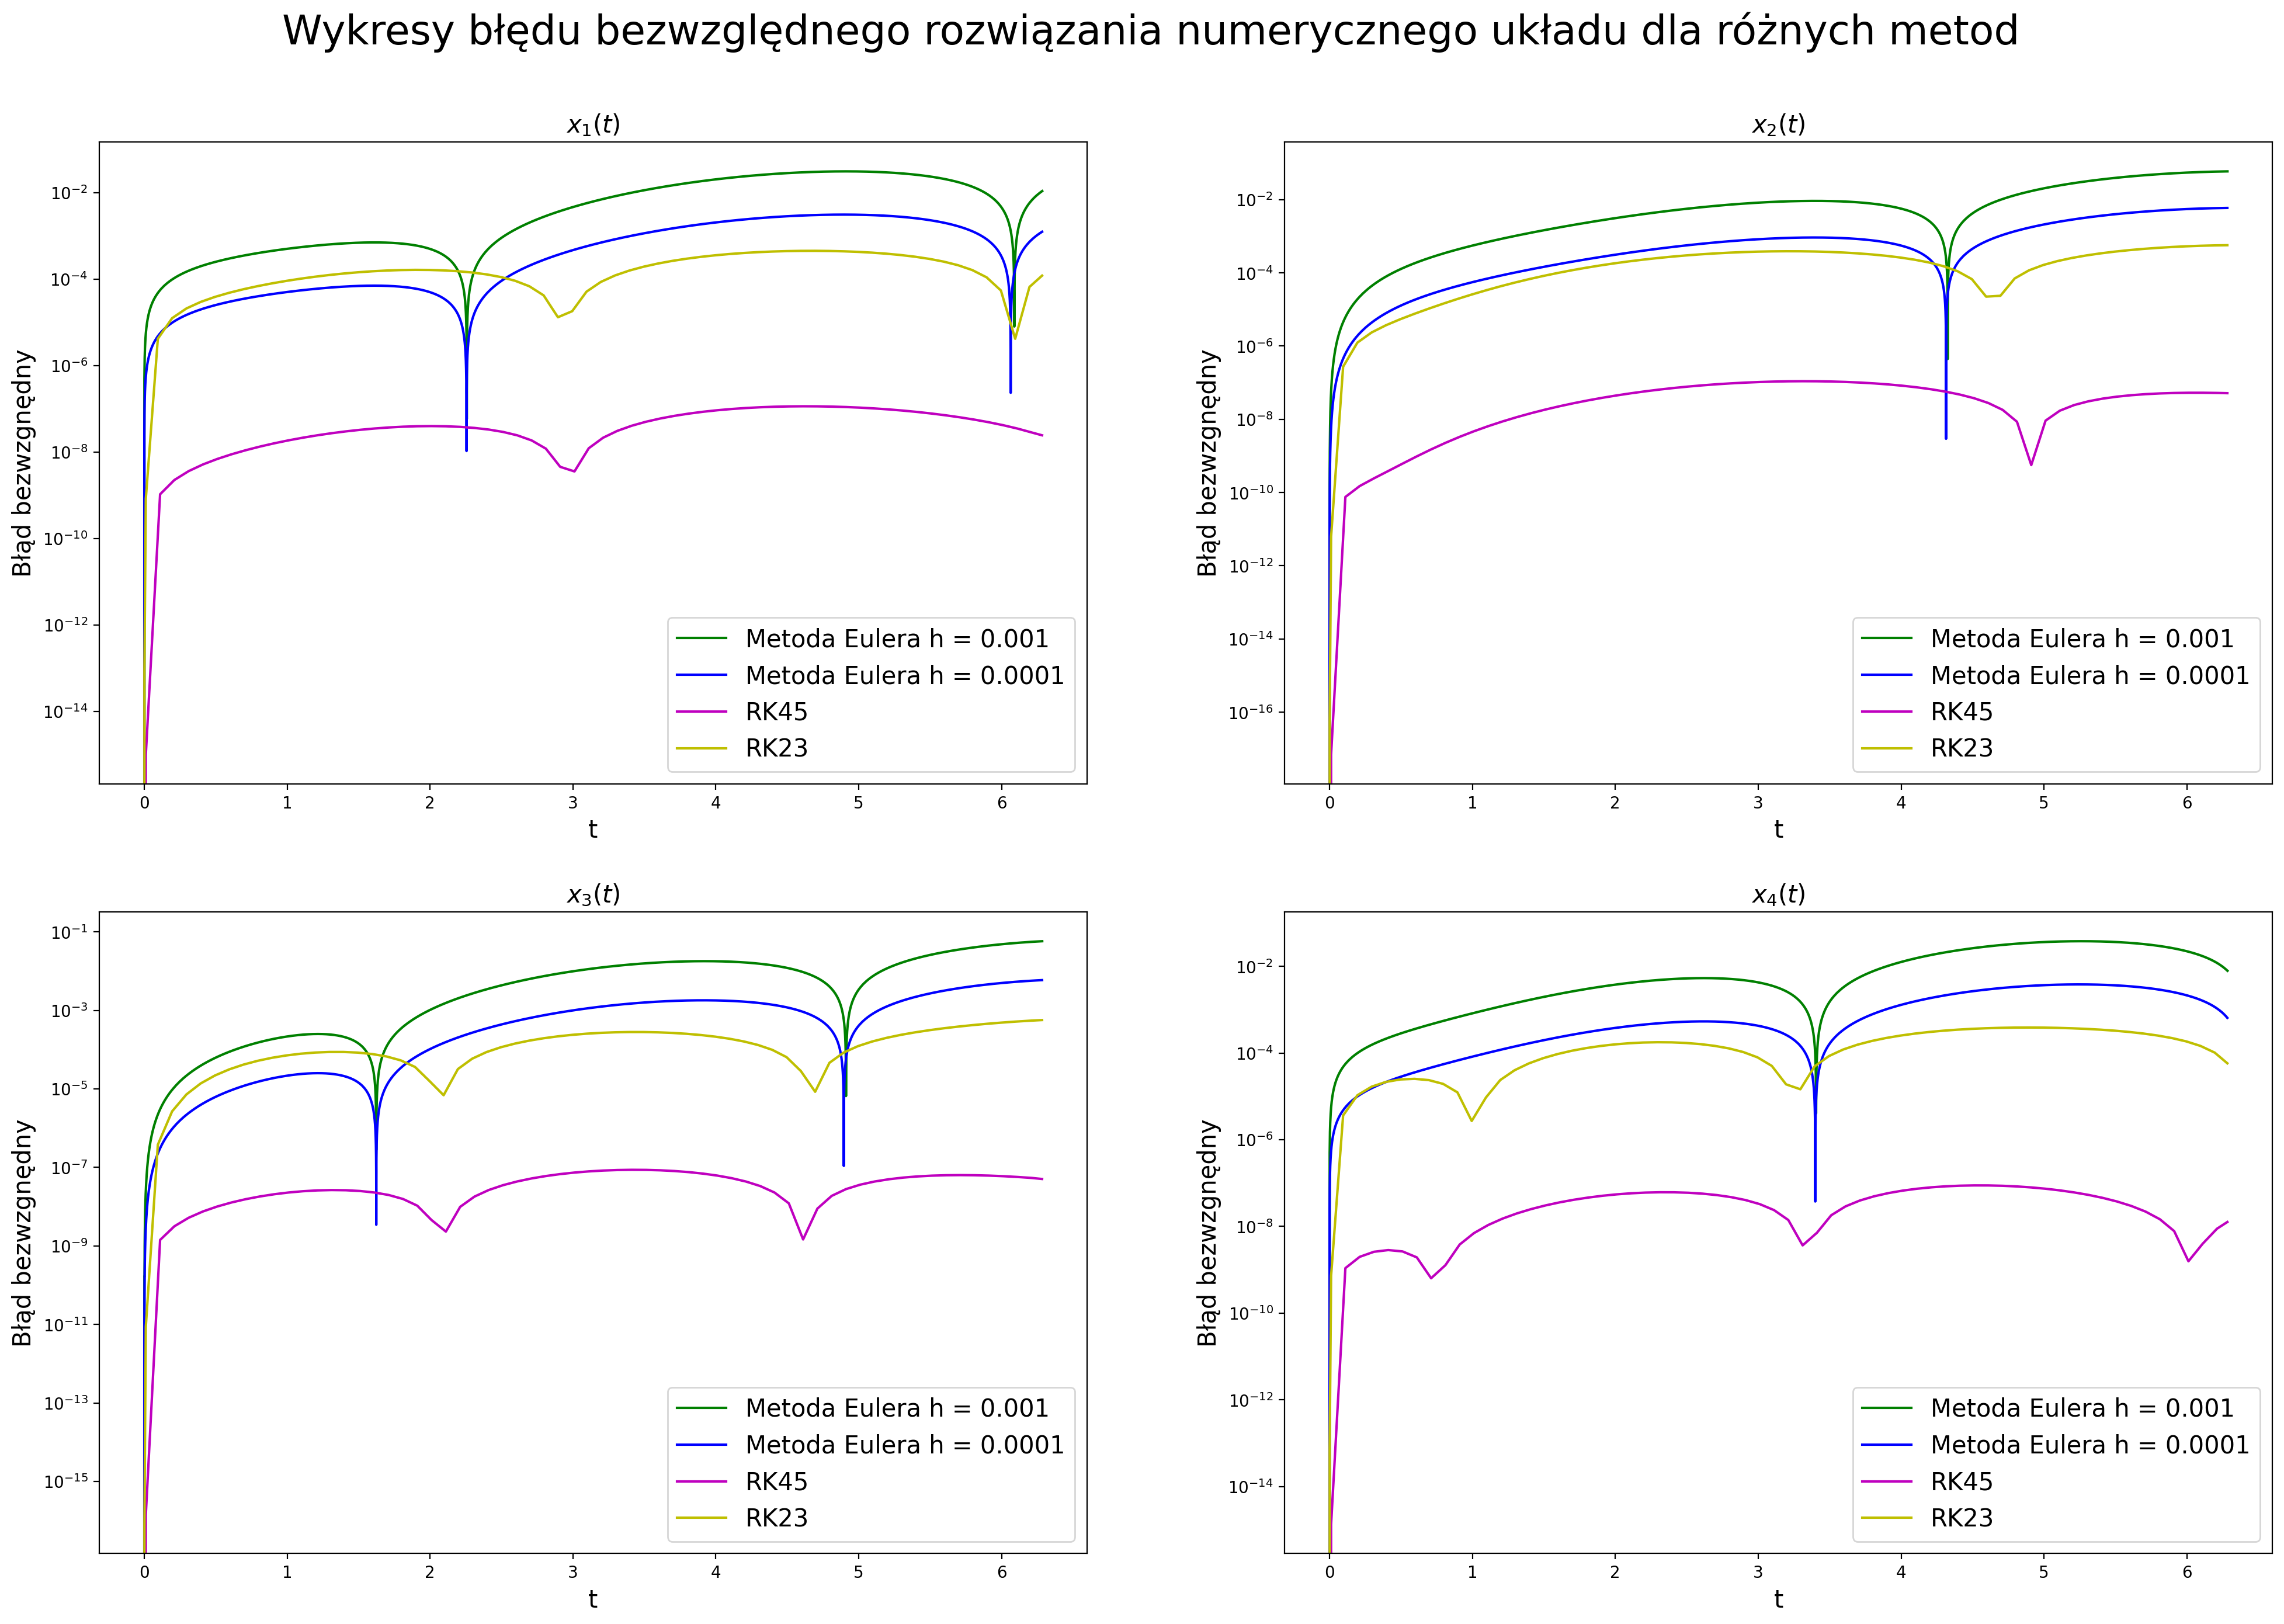

In [61]:
def fun(t,y):
    yr = [y[2],y[3],-(y[0])/(y[0]**2 + y[1]**2)**(3/2),-(y[1])/(y[0]**2 + y[1]**2)**(3/2)]
    return np.array(yr)

def sol(t):
    yr = [np.cos(t), np.sin(t), -np.sin(t), np.cos(t)]
    return np.array(yr)

fig, ax = plt.subplots(2, 2, figsize=(24, 16), dpi=200)
t = np.arange(0,2*np.pi+0.001,0.001)
solution = sol(t)
ax[0][0].plot(t,solution[0],color='r')
ax[0][1].plot(t,solution[1],color='r')
ax[1][0].plot(t,solution[2],color='r')
ax[1][1].plot(t,solution[3],color='r')

y0 = np.array([1, 0, 0, 1])
y_err = []
t_err = []
color=['g','b']
for h,color in zip([0.001,0.0001],color):
    t = np.arange(0,2*np.pi+h,h)
    x = solve_euler(fun,t,y0)
    solution = np.transpose(sol(t))
    y_err.append(np.abs(x - solution))
    t_err.append(t)
    ax[0][0].plot(t,x[:,0],color=color)
    ax[0][1].plot(t,x[:,1],color=color)
    ax[1][0].plot(t,x[:,2],color=color)
    ax[1][1].plot(t,x[:,3],color=color)

RK45 = solve_ivp(fun,(0,2*np.pi),y0=y0,method='RK45',max_step=0.1)
y_err.append(np.transpose(np.abs(sol(RK45.t) - RK45.y)))
t_err.append(RK45.t)
ax[0][0].plot(RK45.t,RK45.y[0],color='m')
ax[0][1].plot(RK45.t,RK45.y[1],color='m')
ax[1][0].plot(RK45.t,RK45.y[2],color='m')
ax[1][1].plot(RK45.t,RK45.y[3],color='m')
RK23 = solve_ivp(fun,(0,2*np.pi),y0=y0,method='RK23',max_step=0.1)
y_err.append(np.transpose(np.abs(sol(RK23.t) - RK23.y)))
t_err.append(RK23.t)
ax[0][0].plot(RK23.t,RK23.y[0],color='y')
ax[0][1].plot(RK23.t,RK23.y[1],color='y')
ax[1][0].plot(RK23.t,RK23.y[2],color='y')
ax[1][1].plot(RK23.t,RK23.y[3],color='y')

ax[0][0].set_title('$x_1(t)$',fontsize=15)
ax[0][1].set_title('$x_2(t)$',fontsize=15)
ax[1][0].set_title('$x_3(t)$',fontsize=15)
ax[1][1].set_title('$x_4(t)$',fontsize=15)
ax[0][0].set_xlabel('t',fontsize=15)
ax[0][1].set_xlabel('t',fontsize=15)
ax[1][0].set_xlabel('t',fontsize=15)
ax[1][1].set_xlabel('t',fontsize=15)
ax[0][0].set_ylabel('y',fontsize=15)
ax[0][1].set_ylabel('y',fontsize=15)
ax[1][0].set_ylabel('y',fontsize=15)
ax[1][1].set_ylabel('y',fontsize=15)
ax[0][0].legend(['Analitycznie', 'Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[0][1].legend(['Analitycznie', 'Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[1][0].legend(['Analitycznie', 'Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[1][1].legend(['Analitycznie', 'Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
fig.suptitle('Wykresy rozwiązania analitycznego i numerycznego układu dla różnych metod',fontsize=25,y=0.95)
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(24, 16), dpi=200)
color=['g','b','m','y']
for er,t,color in zip(y_err,t_err,color):
    ax[0][0].plot(t,er[:,0],color=color)
    ax[0][1].plot(t,er[:,1],color=color)
    ax[1][0].plot(t,er[:,2],color=color)
    ax[1][1].plot(t,er[:,3],color=color)
ax[0][0].set_title('$x_1(t)$',fontsize=15)
ax[0][1].set_title('$x_2(t)$',fontsize=15)
ax[1][0].set_title('$x_3(t)$',fontsize=15)
ax[1][1].set_title('$x_4(t)$',fontsize=15)
ax[0][0].set_xlabel('t',fontsize=15)
ax[0][1].set_xlabel('t',fontsize=15)
ax[1][0].set_xlabel('t',fontsize=15)
ax[1][1].set_xlabel('t',fontsize=15)
ax[0][0].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[0][1].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[1][0].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[1][1].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[0][0].legend(['Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[0][1].legend(['Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[1][0].legend(['Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[1][1].legend(['Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[0][0].set_yscale('log')
ax[0][1].set_yscale('log')
ax[1][0].set_yscale('log')
ax[1][1].set_yscale('log')
fig.suptitle('Wykresy błędu bezwzględnego rozwiązania numerycznego układu dla różnych metod',fontsize=25,y=0.95)
plt.show()

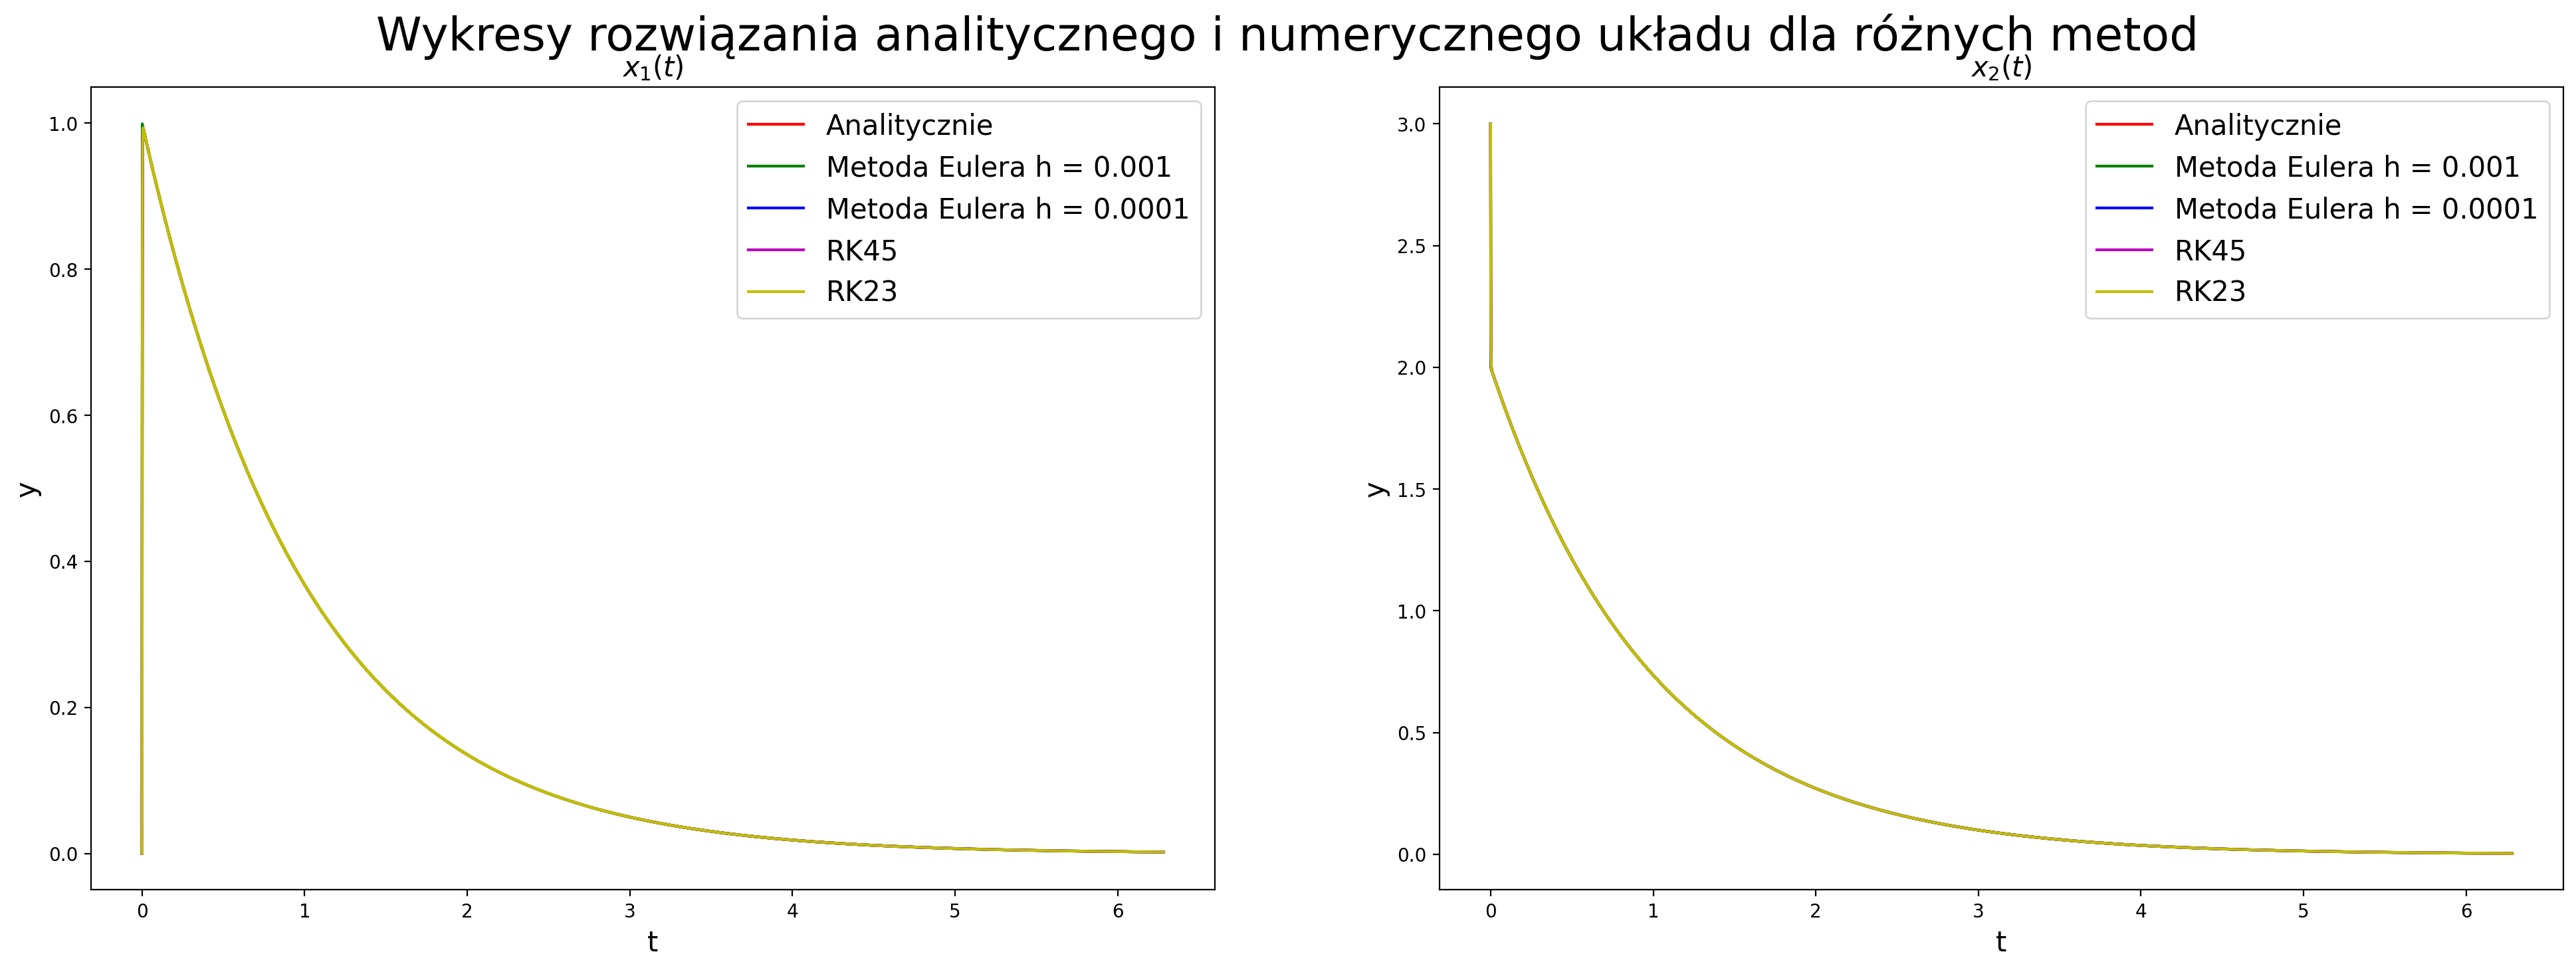

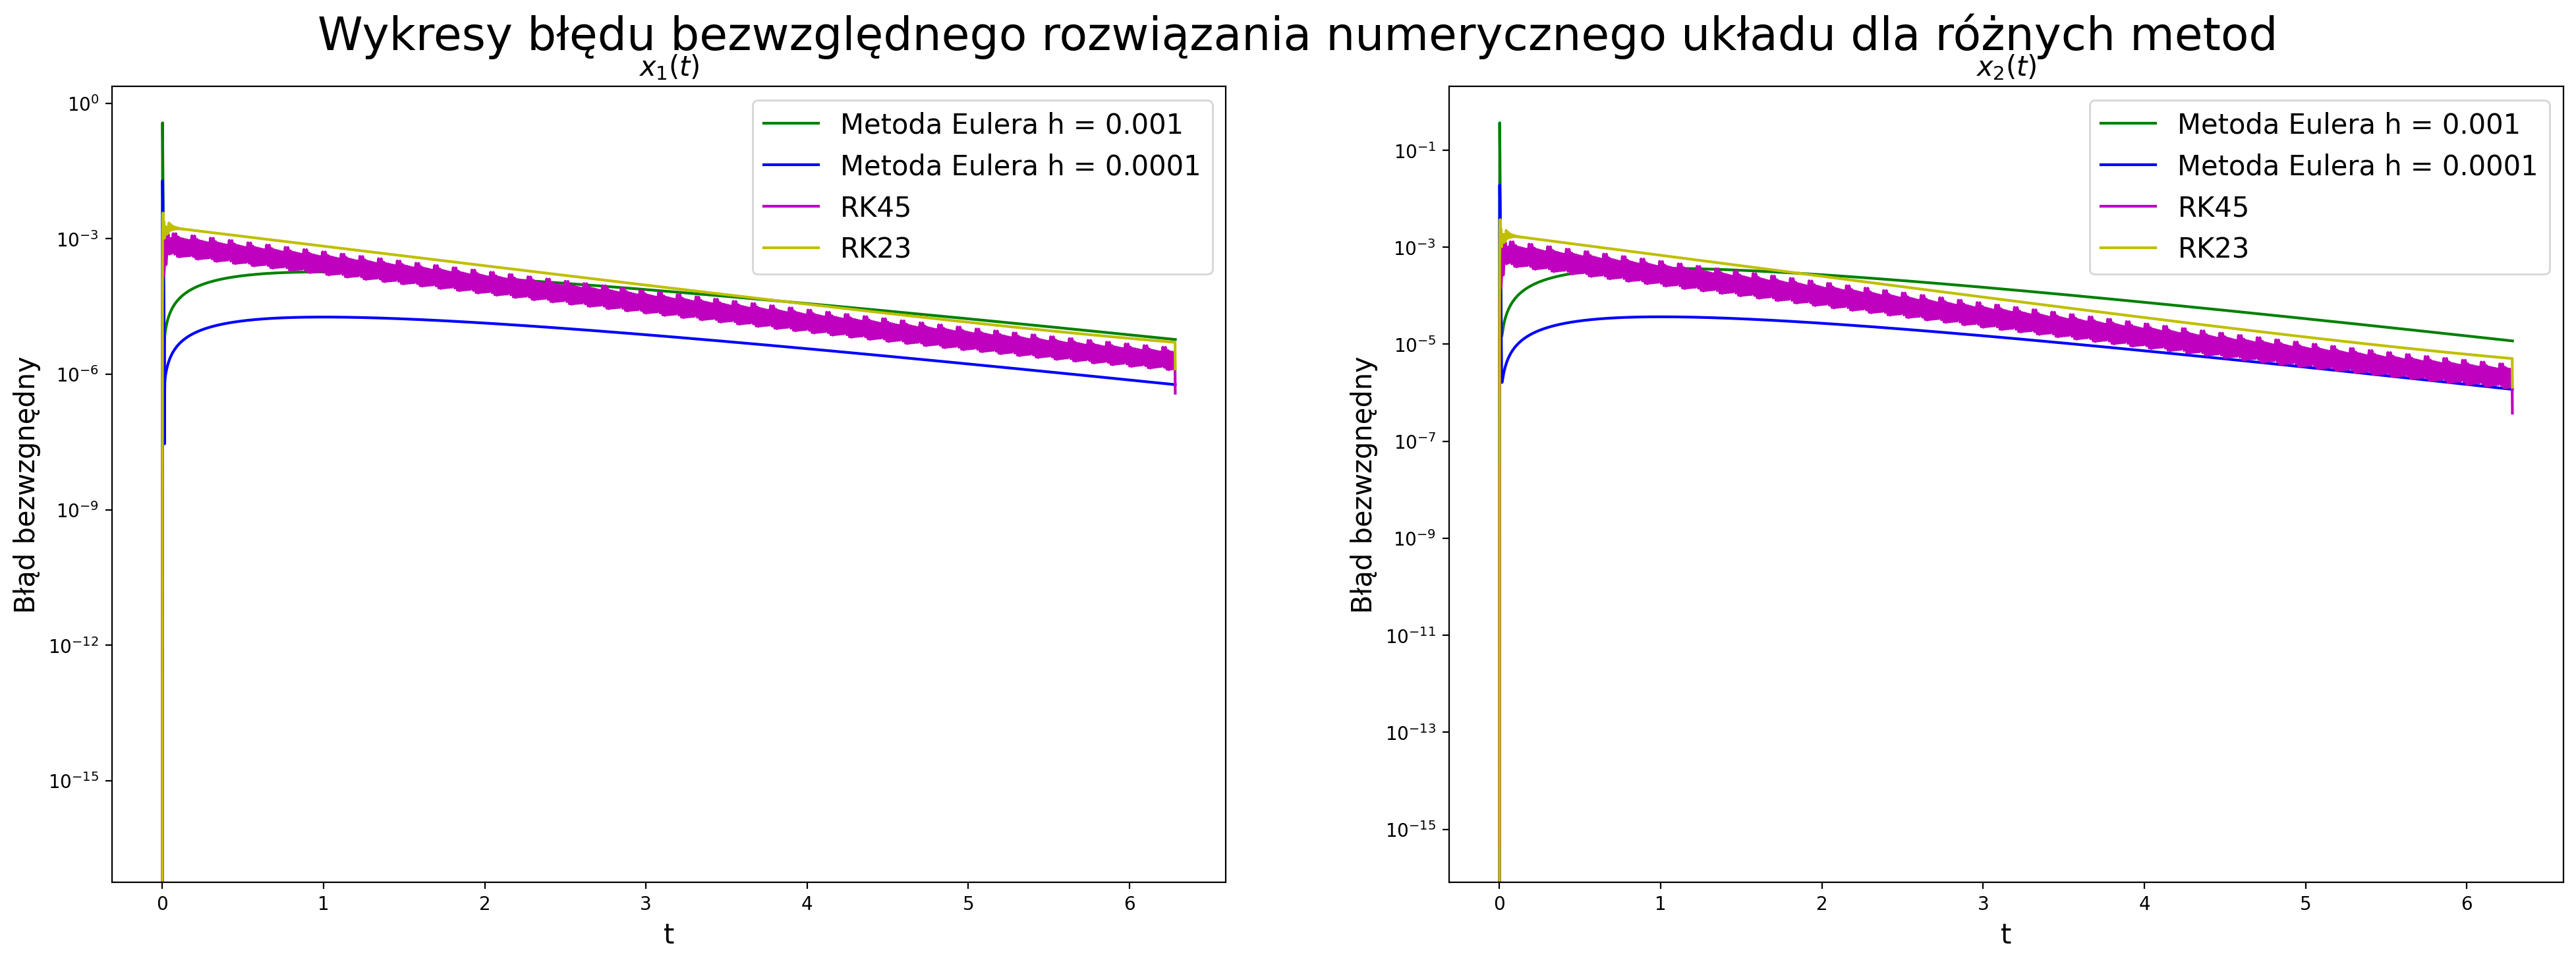

In [62]:
def fun(t,y):
    yr = [-667 * y[0] + 333 * y[1], 666 * y[0] - 334 * y[1]]
    return np.array(yr)

def sol(t):
    yr = [np.exp(-t) - np.exp(-1000 * t), 2 * np.exp(-t) + np.exp(-1000 * t)]
    return np.array(yr)

fig, ax = plt.subplots(1, 2, figsize=(24, 8), dpi=200)
t = np.arange(0,2*np.pi+0.001,0.001)
solution = sol(t)
ax[0].plot(t,solution[0],color='r')
ax[1].plot(t,solution[1],color='r')

y0 = np.array([0, 3])
y_err = []
t_err = []
color=['g','b']
for h,color in zip([0.001,0.0001],color):
    t = np.arange(0,2*np.pi+h,h)
    x = solve_euler(fun,t,y0)
    solution = np.transpose(sol(t))
    y_err.append(np.abs(x - solution))
    t_err.append(t)
    ax[0].plot(t,x[:,0],color=color)
    ax[1].plot(t,x[:,1],color=color)

RK45 = solve_ivp(fun,(0,2*np.pi),y0=y0,method='RK45',max_step=0.1)
y_err.append(np.transpose(np.abs(sol(RK45.t) - RK45.y)))
t_err.append(RK45.t)
ax[0].plot(RK45.t,RK45.y[0],color='m')
ax[1].plot(RK45.t,RK45.y[1],color='m')
RK23 = solve_ivp(fun,(0,2*np.pi),y0=y0,method='RK23',max_step=0.1)
y_err.append(np.transpose(np.abs(sol(RK23.t) - RK23.y)))
t_err.append(RK23.t)
ax[0].plot(RK23.t,RK23.y[0],color='y')
ax[1].plot(RK23.t,RK23.y[1],color='y')
ax[0].set_title('$x_1(t)$',fontsize=15)
ax[1].set_title('$x_2(t)$',fontsize=15)
ax[0].set_xlabel('t',fontsize=15)
ax[1].set_xlabel('t',fontsize=15)
ax[0].set_ylabel('y',fontsize=15)
ax[1].set_ylabel('y',fontsize=15)
ax[0].legend(['Analitycznie', 'Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[1].legend(['Analitycznie', 'Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
fig.suptitle('Wykresy rozwiązania analitycznego i numerycznego układu dla różnych metod',fontsize=25,y=0.95)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(24, 8), dpi=200)
color=['g','b','m','y']
for er,t,color in zip(y_err,t_err,color):
    ax[0].plot(t,er[:,0],color=color)
    ax[1].plot(t,er[:,1],color=color)

ax[0].set_title('$x_1(t)$',fontsize=15)
ax[1].set_title('$x_2(t)$',fontsize=15)
ax[0].set_xlabel('t',fontsize=15)
ax[1].set_xlabel('t',fontsize=15)
ax[0].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[1].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[0].legend(['Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[1].legend(['Metoda Eulera h = 0.001','Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15,loc='best')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
fig.suptitle('Wykresy błędu bezwzględnego rozwiązania numerycznego układu dla różnych metod',fontsize=25,y=0.95)
plt.show()

In [91]:
def fun(t,y):
    mi = 0.012277471
    mi_ = 1 - mi
    D_1 = ((y[0] + mi) ** 2 + y[2] ** 2) ** (3/2)
    D_2 = ((y[0] - mi_) ** 2 + y[2] ** 2) ** (3/2)
    yr = [y[1], y[0] + 2 * y[3] - mi_ * ((y[0] + mi)/D_1) - mi * ((y[0] - mi_)/D_2), y[3], y[2] - 2 * y[1] - mi_ * (y[2]/D_1) - mi * (y[2]/D_2)]
    return np.array(yr)

T = 17.0652165601579625588917206249
t_001 = np.arange(0,T+0.0001,0.001)
y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
x_001 = solve_euler(fun,t_001,y0)
t_0001 = np.arange(0,T+0.0001,0.0001)
x_0001 = solve_euler(fun,t_0001,y0)
RK45_perfect_solution = solve_ivp(fun,(0,T),y0=y0,method='RK45',max_step=0.0001)
RK45 = solve_ivp(fun,(0,T),y0=y0,method='RK45',max_step=0.1)
RK23 = solve_ivp(fun,(0,T),y0=y0,method='RK23',max_step=0.1)

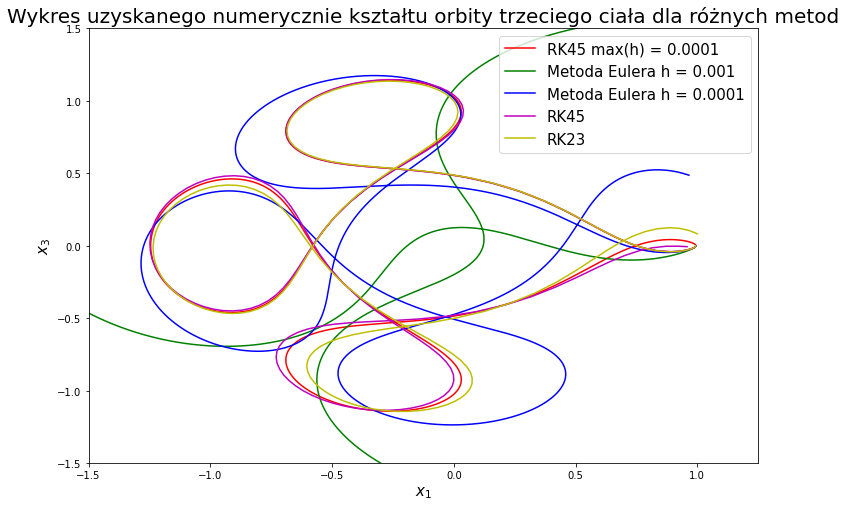

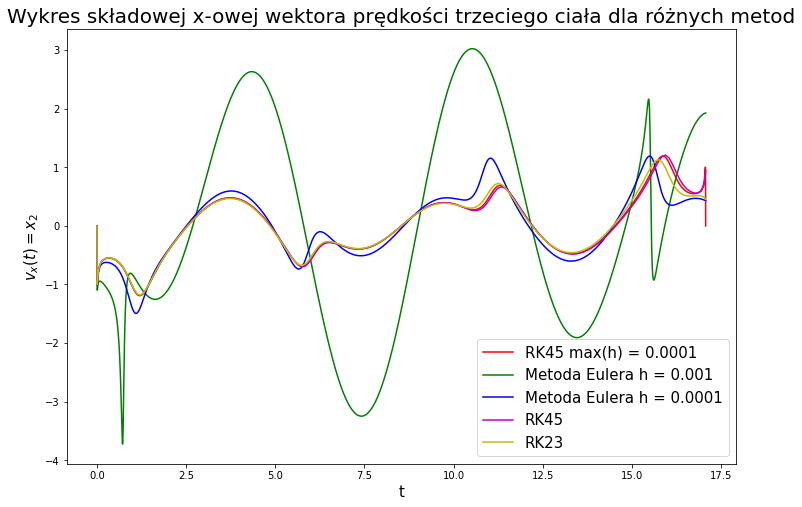

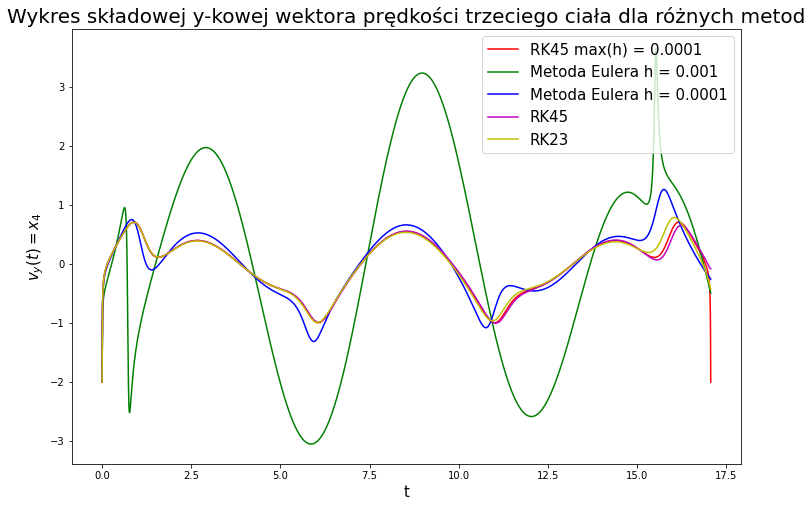

In [99]:
plt.figure(figsize=(12, 8))
plt.plot(RK45_perfect_solution.y[0],RK45_perfect_solution.y[2],'r')
plt.plot(x_001[:, 0], x_001[:, 2],'g')
plt.plot(x_0001[:, 0], x_0001[:, 2],'b')
plt.plot(RK45.y[0],RK45.y[2],'m')
plt.plot(RK23.y[0],RK23.y[2],'y')
plt.title('Wykres uzyskanego numerycznie kształtu orbity trzeciego ciała dla różnych metod',fontsize=20)
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('$x_3$',fontsize=15)
plt.axis([-1.5,1.25,-1.5,1.5])
plt.legend(['RK45 max(h) = 0.0001','Metoda Eulera h = 0.001', 'Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(RK45_perfect_solution.t,RK45_perfect_solution.y[1],'r')
plt.plot(t_001,x_001[:, 1],'g')
plt.plot(t_0001,x_0001[:, 1],'b')
plt.plot(RK45.t,RK45.y[1],'m')
plt.plot(RK23.t,RK23.y[1],'y')
plt.title('Wykres składowej x-owej wektora prędkości trzeciego ciała dla różnych metod',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('$v_x(t) = x_2$',fontsize=15)
plt.legend(['RK45 max(h) = 0.0001','Metoda Eulera h = 0.001', 'Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(RK45_perfect_solution.t,RK45_perfect_solution.y[3],'r')
plt.plot(t_001,x_001[:, 3],'g')
plt.plot(t_0001,x_0001[:, 3],'b')
plt.plot(RK45.t,RK45.y[3],'m')
plt.plot(RK23.t,RK23.y[3],'y')
plt.title('Wykres składowej y-kowej wektora prędkości trzeciego ciała dla różnych metod',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('$v_y(t) = x_4$',fontsize=15)
plt.legend(['RK45 max(h) = 0.0001','Metoda Eulera h = 0.001', 'Metoda Eulera h = 0.0001','RK45','RK23'],fontsize=15)
plt.show()

Metoda rozwiązywania równań różniczkowych RK45 zdecydowanie radzi sobie najlepiej w większości przeprowadzonych porównań pomimo faktu, że maksymalny krok dla obydwu mettod RK45 i RK23 był ustawiony na dość dużą wartość -> 0,1 kiedy to metoda Eulera w przód była badana dla dużo mniejszsych kroków 0,001 i 0,0001. Jedynym wyjątkiem było zadanie polegające na rozwiązaniu układu równań różniczkowych z macierzą $A$, dla której metody Rungego-Kutty zwróciły większy błąd niż metoda Eulera w przód. Oczywiście jest to związane zarówno z źle uwarunkowaną macierzą $A$, jak i z dużym maksymalnym krokiem ustawionym dla obydwu algorytmów RK. Dla przeciętnych przykłądów metody RK wypadają znacznie lepiej.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
